<a href="https://colab.research.google.com/github/rogerpanel/CV/blob/main/NLP_binary_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TO ENSURE GPU IS ACTIVE
import tensorflow as tf

# List available GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)  # Enable GPU memory growth


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

path="/content/gdrive/MyDrive/Академия научного наставничества IT/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

train=pd.read_csv(path+"train.csv")
train

,id,text,author
0,3161,A new service called Twitter Alerts has been a...,chatgpt
1,24964,Swansea City fans will be delighted to hear th...,chatgpt
2,22861,Ready to go: Ross McCormack took part in Fulha...,person
3,68204,Penn Station is the busiest transportation hub...,chatgpt
4,10289,"The government, which had been the guarantor o...",chatgpt
...,...,...,...
84595,73004,"The cone-shaped machine, decelerated by a sequ...",chatgpt
84596,42153,CNN Student News offers a unique opportunity f...,chatgpt
84597,25941,"Cornelius Jefferson, a 33-year-old resident of...",chatgpt
84598,37518,Europe is experiencing a growing tendency away...,chatgpt


In [ ]:
test=pd.read_csv(path+"test.csv")
test

,id,text
0,68113,There have been 50 online bomb threats made si...
1,19660,"Haifa Port, situated on the Mediterranean coas..."
2,79151,Connecticut Senator Richard Blumenthal had a s...
3,8415,Ohio's governor on Friday signed an executive ...
4,12307,"Kadaram was not the only target of the attack,..."
...,...,...
9394,84010,It's likely someone from Hong Kong has just be...
9395,241,"Calvin Veltman undertook, for the National Cen..."
9396,24258,I was so paranoid I might find a lump that I e...
9397,26109,"By . Laura Powell . PUBLISHED: . 16:13 EST, 3 ..."


<BarContainer object of 2 artists>

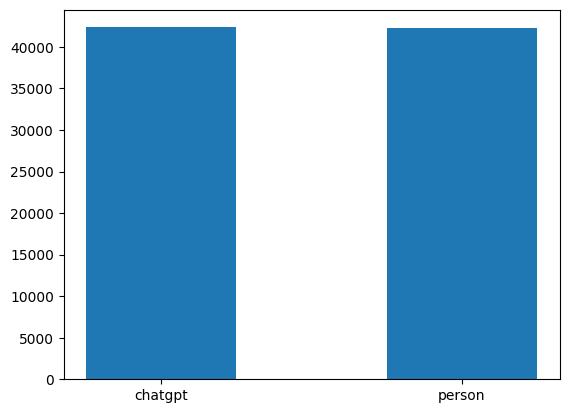

In [ ]:
import matplotlib.pyplot as plt

groups = ["chatgpt", "person"]
counts = [len(train.loc[train["author"]=="chatgpt"]), len(train.loc[train["author"]=="person"])]

plt.bar(groups, counts, width=0.5)

<Axes: >

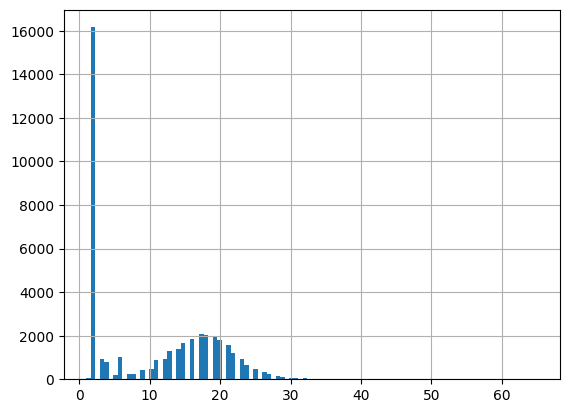

In [ ]:
seq_len = [len(str(i).split(".")) for i in train.loc[train["author"]=="chatgpt"]["text"]]
pd.Series(seq_len).hist(bins = 100)

<Axes: >

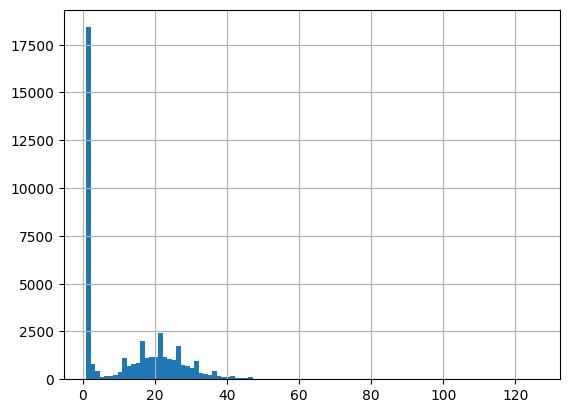

In [ ]:
seq_len = [len(str(i).split(".")) for i in train.loc[train["author"]=="person"]["text"]]
pd.Series(seq_len).hist(bins = 100)

In [ ]:
seq_len = [len(str(i).split(".")) for i in train["text"]]
train.loc[:, "points"] = seq_len

seq_len = [len(str(i).split(".")) for i in test["text"]]
test.loc[:, "points"] = seq_len

<Axes: >

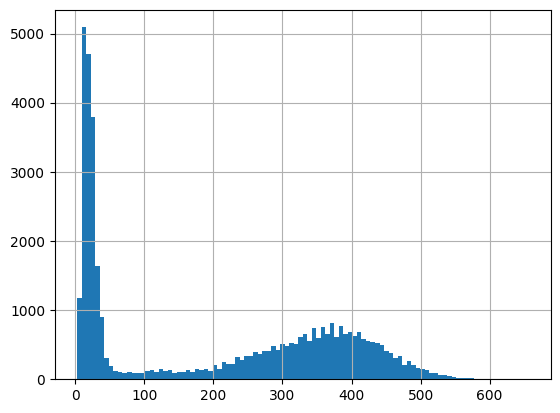

In [ ]:
seq_len = [len(str(i).split()) for i in train.loc[train["author"]=="chatgpt"]["text"]]
pd.Series(seq_len).hist(bins = 100)

<Axes: >

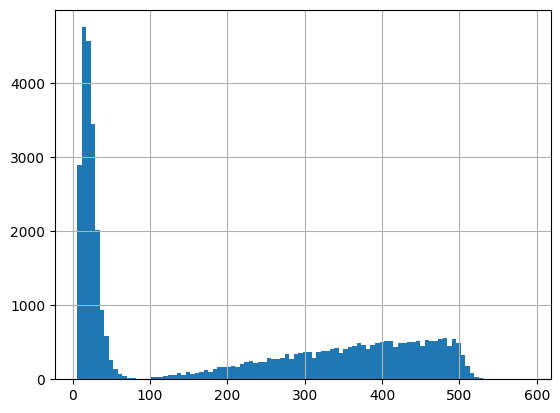

In [ ]:
seq_len = [len(str(i).split()) for i in train.loc[train["author"]=="person"]["text"]]
pd.Series(seq_len).hist(bins = 100)

In [ ]:
seq_len = [len(str(i).split()) for i in train["text"]]
train.loc[:, "words"] = seq_len

seq_len = [len(str(i).split()) for i in test["text"]]
test.loc[:, "words"] = seq_len

In [ ]:
train.loc[train["author"]=="chatgpt", 'author']=0
train.loc[train["author"]=="person", 'author']=1
train

,id,text,author,points,words
0,3161,A new service called Twitter Alerts has been a...,0,12,232
1,24964,Swansea City fans will be delighted to hear th...,0,14,280
2,22861,Ready to go: Ross McCormack took part in Fulha...,1,2,19
3,68204,Penn Station is the busiest transportation hub...,0,2,19
4,10289,"The government, which had been the guarantor o...",0,2,23
...,...,...,...,...,...
84595,73004,"The cone-shaped machine, decelerated by a sequ...",0,6,20
84596,42153,CNN Student News offers a unique opportunity f...,0,10,231
84597,25941,"Cornelius Jefferson, a 33-year-old resident of...",0,10,170
84598,37518,Europe is experiencing a growing tendency away...,0,2,23


In [ ]:
punctuation_signs = list("?:!.,;")
for punct_sign in punctuation_signs:
    train['text'] = train['text'].str.replace(punct_sign, '')
    test['text'] = test['text'].str.replace(punct_sign, '')

<ipython-input-14-03ad3a5b4729>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['text'] = train['text'].str.replace(punct_sign, '')
<ipython-input-14-03ad3a5b4729>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test['text'] = test['text'].str.replace(punct_sign, '')


In [ ]:
import re

def del_s(df, col):
    text_list = []
    for row in range(len(df)):
        lemmatized_list = []
        text = df.iloc[row][col]
        text=re.sub("[^a-zA-Z]"," ",text)
        text_list.append(text)
    return text_list
train["text"]=del_s(train, "text")
test["text"]=del_s(test, "text")

In [ ]:
from sklearn.utils import shuffle
train = shuffle(train)
train

,id,text,author,points,words
60967,88192,Another Alaskan transportation method is the d...,1,2,7
59771,946,Russia s president and the newly elected presi...,1,19,373
58631,49067,The temple that exists today was erected in th...,0,2,28
1619,41689,A knee injury caused Arsenal A to lose o...,0,2,13
49955,59126,Former Liverpool and Tottenham midfielder Jami...,0,8,157
...,...,...,...,...,...
21099,43406,The community of Mason City Iowa is in shock f...,0,12,242
9980,90819,Tragedy struck during the South Australian Ski...,0,12,205
59429,11939,Swansea City striker Wilfried Bony is due to t...,0,13,283
2566,50014,Two major civil liberties groups filed a lawsu...,1,24,341


In [ ]:
import nltk
import re

nltk.download("stopwords") # поддерживает удаление стоп-слов
nltk.download('punkt') # делит текст на список предложений
nltk.download('wordnet') # проводит лемматизацию
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def func(df, col):
    wordnet_lemmatizer = nltk.WordNetLemmatizer()
    lemmatized_text_list = []
    for row in range(len(df)):
        lemmatized_list = []
        text = df.iloc[row][col]
        text_words = text.split(" ")
        for word in text_words:
            word_norm = wordnet_lemmatizer.lemmatize(word)
            lemmatized_list.append(word_norm)
        lemmatized_text = " ".join(lemmatized_list)
        lemmatized_text_list.append(lemmatized_text)
    return lemmatized_text_list


train["text"] = func(train, "text")
test["text"] = func(test, "text")

In [ ]:
all_data=pd.concat([train, test])
all_data

,id,text,author,points,words
60967,88192,Another Alaskan transportation method is the d...,1,2,7
59771,946,Russia s president and the newly elected presi...,1,19,373
58631,49067,The temple that exists today wa erected in the...,0,2,28
1619,41689,A knee injury caused Arsenal A to lose o...,0,2,13
49955,59126,Former Liverpool and Tottenham midfielder Jami...,0,8,157
...,...,...,...,...,...
9394,84010,It s likely someone from Hong Kong ha just bea...,NaN,35,360
9395,241,Calvin Veltman undertook for the National Cent...,NaN,2,28
9396,24258,I wa so paranoid I might find a lump that I ev...,NaN,2,16
9397,26109,By Laura Powell PUBLISHED EST August...,NaN,27,388


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer( max_features = 500)
matrix = count.fit_transform(all_data["text"]).toarray()

In [ ]:
matrix[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
matrix = tfidf.fit_transform(all_data["text"]).toarray()

In [ ]:
for i in range(len(train)):
  np.append(matrix[i],train.iloc[i]["points"])
  np.append(matrix[i],train.iloc[i]["words"])
for i in range(len(test)):
  np.append(matrix[len(train)+i],test.iloc[i]["points"])
  np.append(matrix[len(train)+i],test.iloc[i]["words"])

In [ ]:
X=matrix[:len(train)-5000]
y=train["author"].to_numpy().astype('int')[:-5000]

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Train the model in batches
batch_size = 64
epochs = 50
steps_per_epoch = len(X_train_scaled) // batch_size
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),
                    epochs=epochs, batch_size=batch_size, steps_per_epoch=steps_per_epoch,
                    callbacks=[early_stopping], verbose=1)


In [ ]:
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_pred=model.predict(matrix[len(train)-5000:len(train)])
y_true=train["author"].to_numpy().astype('int')[-5000:]

confusion = confusion_matrix(y_true, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
print(sklearn.metrics.accuracy_score(y_true, y_pred))
print(sklearn.metrics.f1_score(y_true, y_pred))